# Тема: Нейронная сеть классифицирует зерна кофе по степени обжарки по их изображению.

In [ ]:
from PIL import Image
from pathlib import Path
import random
import os

Загрузим датасет:

In [ ]:
p=Path('Coffee Bean Dataset/')

In [ ]:
im_path = []
for dirpath, dirnames, filenames in os.walk(p):
    for filename in filenames:
        im_path.append(os.path. join(dirpath, filename))
im_path

['Coffee Bean Dataset\\test\\Dark\\dark (1).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (10).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (100).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (11).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (12).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (13).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (14).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (15).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (16).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (17).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (18).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (19).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (2).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (20).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (21).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (22).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (23).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (24).png',
 'Coffee Bean Dataset\\test\\Dark\\dark (25).png',
 'Coffee Bean Dataset\\test\\Dar

Проанализируем датасет:

In [ ]:
len(im_path)

1600

In [ ]:
test_count = 0
train_count = 0
for x in range(len(im_path)):
    if im_path[x].split('\\')[1] == 'test':
        test_count += 1
    if im_path[x].split('\\')[1] == 'train':
        train_count += 1
print(test_count)
print(train_count)

400
1200


Посмотрим на примеры изображений из датасета:

Light


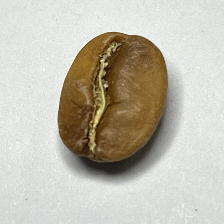

In [ ]:
path = random.choice(im_path)
img = Image.open(path)
cl = path.split('\\')[-2]
print(cl)
img

Light


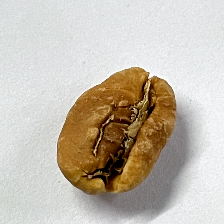

In [ ]:
path = random.choice(im_path)
img = Image.open(path)
cl = path.split('\\')[-2]
print(cl)
img

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Узнаем размер изображений в датасете и какие бывают типы обжарки (Light, Green, Medium, Dark):

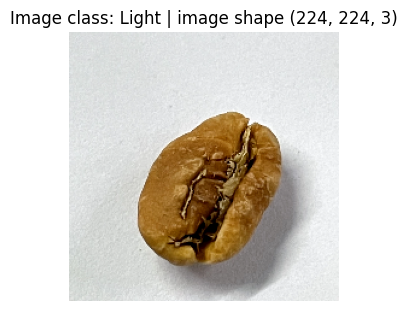

In [ ]:
arr = np.asarray(img)
plt.figure(figsize=(5, 3.5))
plt.imshow(arr)
plt.title(f'Image class: {cl} | image shape {arr.shape}')
plt.axis(False);

In [ ]:
cl_names = []
for dirpath, dirnames, filenames in os.walk('Coffee Bean Dataset/train'):
    for dirname in dirnames:
        if dirname not in cl_names:
            cl_names.append(dirname)
cl_names

['Dark', 'Green', 'Light', 'Medium']

Разобьем датасет на обучающую и тестовую выборку:

In [ ]:
files_num = 0
sp_tr = []
for i in cl_names:
    for x in os. listdir('Coffee Bean Dataset/train/' + i):
        files_num += 1
    sp_tr.append(files_num)
    files_num=0
sp_test = []
for i in cl_names:
    for x in os. listdir('Coffee Bean Dataset/test/' + i):
        files_num += 1
    sp_test.append(files_num)
    files_num=0
print(sp_tr)
print(sp_test)

[300, 300, 300, 300]
[100, 100, 100, 100]


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame()
df['Class_names'] = cl_names
df['Train_count'] = sp_tr
df['Test_count'] = sp_test
df

,Class_names,Train_count,Test_count
0,Dark,300,100
1,Green,300,100
2,Light,300,100
3,Medium,300,100


In [ ]:
df.describe()

,Train_count,Test_count
count,4.0,4.0
mean,300.0,100.0
std,0.0,0.0
min,300.0,100.0
25%,300.0,100.0
50%,300.0,100.0
75%,300.0,100.0
max,300.0,100.0


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

Изменим размеры изображений в датасете:

In [ ]:
data_transform = transforms. Compose([
transforms.Resize(size=(64, 64)),
transforms. RandomHorizontalFlip(p=0.5),
transforms. ToTensor()
])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

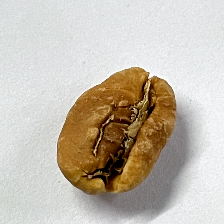

In [ ]:
img

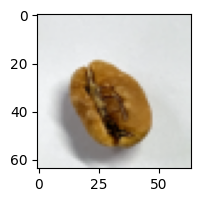

In [ ]:
plt.figure(figsize=(3,2))
plt.imshow(data_transform(img).permute(1, 2, 0));

In [ ]:
train_data = datasets. ImageFolder(root='Coffee Bean Dataset/train',
transform=data_transform,
target_transform=None)
test_data = datasets.ImageFolder(root='Coffee Bean Dataset/test',
transform=data_transform)

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 1200
    Root location: Coffee Bean Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
test_data

Dataset ImageFolder
    Number of datapoints: 400
    Root location: Coffee Bean Dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

Зададим классам числовые индексы:

In [ ]:
class_names = train_data.classes
class_names

['Dark', 'Green', 'Light', 'Medium']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'Dark': 0, 'Green': 1, 'Light': 2, 'Medium': 3}

Пример векторизации изображения:

In [ ]:
batch_size = 32
train_DL = DataLoader(dataset=train_data,
                    batch_size=batch_size,
                    num_workers=os.cpu_count(),
                    shuffle=True)
test_DL = DataLoader(dataset=test_data,
                    batch_size=batch_size,
                    num_workers=os.cpu_count(),
                    shuffle=False)

In [ ]:
img, label = next(iter(train_DL))
print(img.shape)
print(label.shape)

torch.Size([32, 3, 64, 64])
torch.Size([32])


In [ ]:
img

tensor([[[[0.8706, 0.8745, 0.8863,  ..., 0.9490, 0.9373, 0.9333],
          [0.8824, 0.8902, 0.8941,  ..., 0.9451, 0.9373, 0.9333],
          [0.8863, 0.8863, 0.8863,  ..., 0.9529, 0.9451, 0.9373],
          ...,
          [0.8745, 0.8784, 0.8863,  ..., 0.9255, 0.9333, 0.9294],
          [0.8745, 0.8824, 0.8824,  ..., 0.9412, 0.9412, 0.9294],
          [0.8745, 0.8863, 0.8863,  ..., 0.9294, 0.9333, 0.9294]],

         [[0.8902, 0.8941, 0.9059,  ..., 0.9569, 0.9529, 0.9490],
          [0.9020, 0.9059, 0.9137,  ..., 0.9529, 0.9490, 0.9451],
          [0.9059, 0.9059, 0.9059,  ..., 0.9608, 0.9569, 0.9490],
          ...,
          [0.8941, 0.8980, 0.9020,  ..., 0.9333, 0.9412, 0.9412],
          [0.8941, 0.9020, 0.9020,  ..., 0.9490, 0.9490, 0.9412],
          [0.8941, 0.9059, 0.9059,  ..., 0.9412, 0.9451, 0.9412]],

         [[0.8824, 0.8863, 0.8980,  ..., 0.9569, 0.9490, 0.9490],
          [0.8980, 0.9020, 0.9059,  ..., 0.9569, 0.9490, 0.9451],
          [0.9020, 0.9020, 0.8980,  ..., 0

In [ ]:
label

tensor([0, 1, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 3, 1, 3, 3, 2, 2, 1, 0, 1, 0, 2, 1,
        2, 2, 0, 0, 3, 2, 3, 2])

Модель:

In [ ]:
class Pict_cl_1(torch.nn.Module):
    def __init__(self, inp, out, hidden_units):
        super().__init__()
        self.conv_1 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=inp, out_channels=hidden_units,
                kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                kernel_size=3, stride=1, padding=1),
        torch.nn.MaxPool2d(kernel_size=2))
        self.conv_2 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units, kernel_size=3,
                stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units, kernel_size=3,
                stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2))

        self.classifier = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=hidden_units*16*16,
                            out_features=out),
            torch.nn.Softmax(dim=1)
        )
    def forward(self, x):
        x = self.conv_1(x)
        x = self.conv_2(x)
        x = self.classifier(x)
        return x

In [ ]:
torch.manual_seed(15)
mod_1 = Pict_cl_1(inp=3, out=len(class_names), hidden_units=15)

In [ ]:
from sklearn.metrics import accuracy_score as acc

Вспомогательные функции для обучения:

In [ ]:
def train_step(model: torch.nn.Module,
            dataloader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            optimizer: torch.optim.Optimizer):

    train_loss, train_acc = 0, 0

    for x, y in dataloader:
        model.train()
        y_logits = model(x)
        loss=loss_fn(y_logits, y)
        train_loss += loss
        train_acc += acc(y, y_logits.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
            dataloader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module):

    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for x_test, y_test in dataloader:
            test_logits = model(x_test)
            test_loss += loss_fn(test_logits, y_test)
            test_acc += acc(y_test, test_logits.argmax(dim=1))
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    return test_loss, test_acc

In [ ]:
def train_nn(model: torch.nn.Module,
            train_DL: torch.utils.data.DataLoader,
            test_DL: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            optimizer: torch.optim.Optimizer,
            epochs: int):

    res = {'train_loss': [],
            'train_acc': [],
            'test_loss': [],
            'test_acc': []}

    for i in range(epochs):
        train_loss, train_acc = train_step(model=model,
                                            dataloader=train_DL,
                                            loss_fn=loss_fn,
                                            optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_DL,
                                        loss_fn=loss_fn)
        print(f'Epoch: {i} | Train_loss: {train_loss: .4f} | Train_acc: {train_acc: .4f}')
        print(f'Evaluation | Test_loss: {test_loss :.4f} | Test_acc: {test_acc: .4f}')
        print()

        res['train_loss'].append(train_loss)
        res['train_acc'].append(train_acc)
        res['test_loss' ].append(test_loss)
        res['test_acc'].append(test_acc)
    return res

Обучаем модель:

In [ ]:
mod_1_res = train_nn(model=mod_1,
                    train_DL=train_DL, test_DL=test_DL,
                    loss_fn=torch.nn.CrossEntropyLoss(),
                    optimizer=torch.optim.Adam(params=mod_1.parameters(),
                                                lr=0.001),
                    epochs=24)
mod_1_res

Epoch: 0 | Train_loss:  1.3278 | Train_acc:  0.3906
Evaluation | Test_loss: 1.2332 | Test_acc:  0.4808

Epoch: 1 | Train_loss:  1.1269 | Train_acc:  0.6135
Evaluation | Test_loss: 1.0181 | Test_acc:  0.7476

Epoch: 2 | Train_loss:  1.0052 | Train_acc:  0.7475
Evaluation | Test_loss: 0.9976 | Test_acc:  0.7476

Epoch: 3 | Train_loss:  0.9946 | Train_acc:  0.7516
Evaluation | Test_loss: 0.9652 | Test_acc:  0.7885

Epoch: 4 | Train_loss:  0.9452 | Train_acc:  0.7903
Evaluation | Test_loss: 0.9248 | Test_acc:  0.8269

Epoch: 5 | Train_loss:  0.9159 | Train_acc:  0.8339
Evaluation | Test_loss: 0.8781 | Test_acc:  0.8774

Epoch: 6 | Train_loss:  0.8638 | Train_acc:  0.8914
Evaluation | Test_loss: 0.8579 | Test_acc:  0.8942

Epoch: 7 | Train_loss:  0.8317 | Train_acc:  0.9153
Evaluation | Test_loss: 0.8178 | Test_acc:  0.9231

Epoch: 8 | Train_loss:  0.8334 | Train_acc:  0.9120
Evaluation | Test_loss: 0.8073 | Test_acc:  0.9423

Epoch: 9 | Train_loss:  0.8044 | Train_acc:  0.9416
Evaluation |

{'train_loss': [tensor(1.3278, grad_fn=<DivBackward0>),
  tensor(1.1269, grad_fn=<DivBackward0>),
  tensor(1.0052, grad_fn=<DivBackward0>),
  tensor(0.9946, grad_fn=<DivBackward0>),
  tensor(0.9452, grad_fn=<DivBackward0>),
  tensor(0.9159, grad_fn=<DivBackward0>),
  tensor(0.8638, grad_fn=<DivBackward0>),
  tensor(0.8317, grad_fn=<DivBackward0>),
  tensor(0.8334, grad_fn=<DivBackward0>),
  tensor(0.8044, grad_fn=<DivBackward0>),
  tensor(0.7901, grad_fn=<DivBackward0>),
  tensor(0.7935, grad_fn=<DivBackward0>),
  tensor(0.7839, grad_fn=<DivBackward0>),
  tensor(0.7930, grad_fn=<DivBackward0>),
  tensor(0.7780, grad_fn=<DivBackward0>),
  tensor(0.7931, grad_fn=<DivBackward0>),
  tensor(0.7795, grad_fn=<DivBackward0>),
  tensor(0.7785, grad_fn=<DivBackward0>),
  tensor(0.7736, grad_fn=<DivBackward0>),
  tensor(0.7718, grad_fn=<DivBackward0>),
  tensor(0.7794, grad_fn=<DivBackward0>),
  tensor(0.7707, grad_fn=<DivBackward0>),
  tensor(0.7724, grad_fn=<DivBackward0>),
  tensor(0.7707, gra

Оценим качество обучения

accuracy на test: 0.96

Построим график потерь:

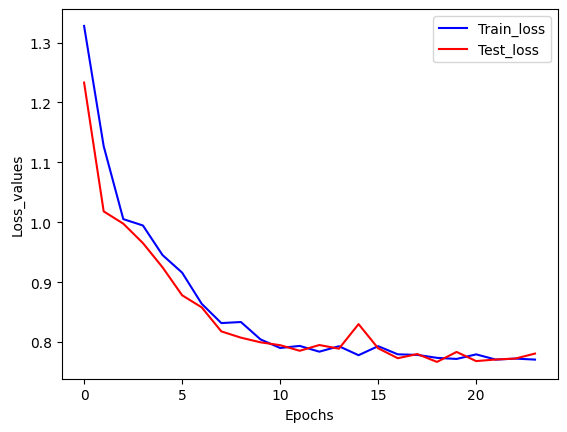

In [ ]:
tr_loss = np.array(torch.tensor(mod_1_res['train_loss']))
test_loss = np.array(torch.tensor(mod_1_res['test_loss']))
plt.plot(tr_loss, c='b', label='Train_loss')
plt.plot(test_loss, c='r', label = 'Test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss_values')
plt.legend();

Построим график для accuracy во время обучения модели на разных эпохах:

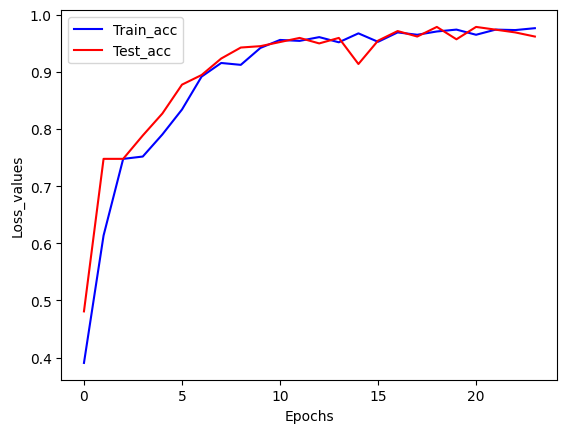

In [ ]:
tr_acc = np.array(torch.tensor(mod_1_res['train_acc']))
test_acc = np.array(torch.tensor(mod_1_res['test_acc']))
plt.plot(tr_acc, c='b', label='Train_acc')
plt.plot(test_acc, c='r', label = 'Test_acc')
plt.xlabel('Epochs')
plt.ylabel('Loss_values')
plt.legend();

Посмотрим, что выдает модель:

In [ ]:
mod_1(img)

tensor([[1.0000e+00, 5.4233e-41, 1.7084e-32, 1.5971e-13],
        [6.5252e-16, 9.9996e-01, 1.1596e-05, 2.6177e-05],
        [1.9990e-36, 4.2940e-16, 1.0000e+00, 1.0872e-06],
        [8.9683e-44, 1.6036e-16, 1.0000e+00, 2.1998e-08],
        [1.2723e-38, 8.1242e-13, 1.0000e+00, 4.1467e-07],
        [0.0000e+00, 1.5496e-19, 1.0000e+00, 2.9476e-09],
        [1.3573e-36, 1.7989e-11, 9.9990e-01, 9.6495e-05],
        [1.0000e+00, 6.8366e-30, 1.8267e-27, 1.2947e-08],
        [1.4028e-09, 7.9606e-09, 4.3491e-06, 1.0000e+00],
        [2.4072e-26, 6.5558e-09, 9.9897e-01, 1.0279e-03],
        [0.0000e+00, 1.3127e-22, 1.0000e+00, 2.0517e-09],
        [1.3733e-43, 1.4717e-19, 1.0000e+00, 1.3580e-07],
        [8.8762e-18, 2.9493e-25, 1.5953e-06, 1.0000e+00],
        [7.6317e-18, 1.0000e+00, 7.9257e-09, 6.8819e-08],
        [1.8173e-10, 1.3349e-12, 4.2122e-08, 1.0000e+00],
        [2.5714e-06, 2.9365e-13, 3.8240e-08, 1.0000e+00],
        [4.8905e-34, 1.8828e-17, 9.9987e-01, 1.3394e-04],
        [0.000

In [ ]:
mod_1(img).shape

torch.Size([32, 4])

Проверка работы:

In [ ]:
import torchvision
transform = transforms. Compose([transforms.Resize(size=(64, 64), antialias=None)])

Изображение из датасета:

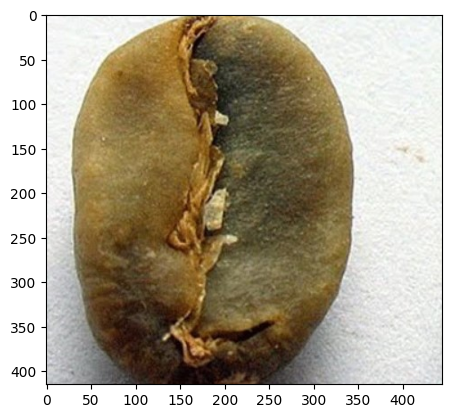

In [ ]:
test_img1 = torchvision.io.read_image('с1.jpg').type(torch.int)
plt.imshow(test_img1.permute(1,2,0))

In [ ]:
tr_test_img1 = transform(test_img1.type(torch.float32))
tr_test_img1.shape

torch.Size([3, 64, 64])

In [ ]:
mod_1.eval()
with torch.inference_mode():
    pred = mod_1(tr_test_img1.unsqueeze(0))
class_names[pred.argmax(dim=1)]

'Light'

Изображение из интернета:

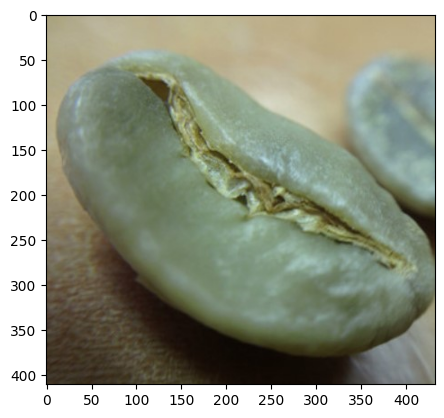

In [ ]:
test_img2 = torchvision.io.read_image('c4.jpg').type(torch.int)
plt.imshow(test_img2.permute(1,2,0))

In [ ]:
tr_test_img2 = transform(test_img2.type(torch.float32))
tr_test_img2.shape

torch.Size([3, 64, 64])

In [ ]:
mod_1.eval()
with torch.inference_mode():
    pred = mod_1(tr_test_img2.unsqueeze(0))
class_names[pred.argmax(dim=1)]

'Green'